# Задание 1

## Запуск spark-сессии

Скрин YARN
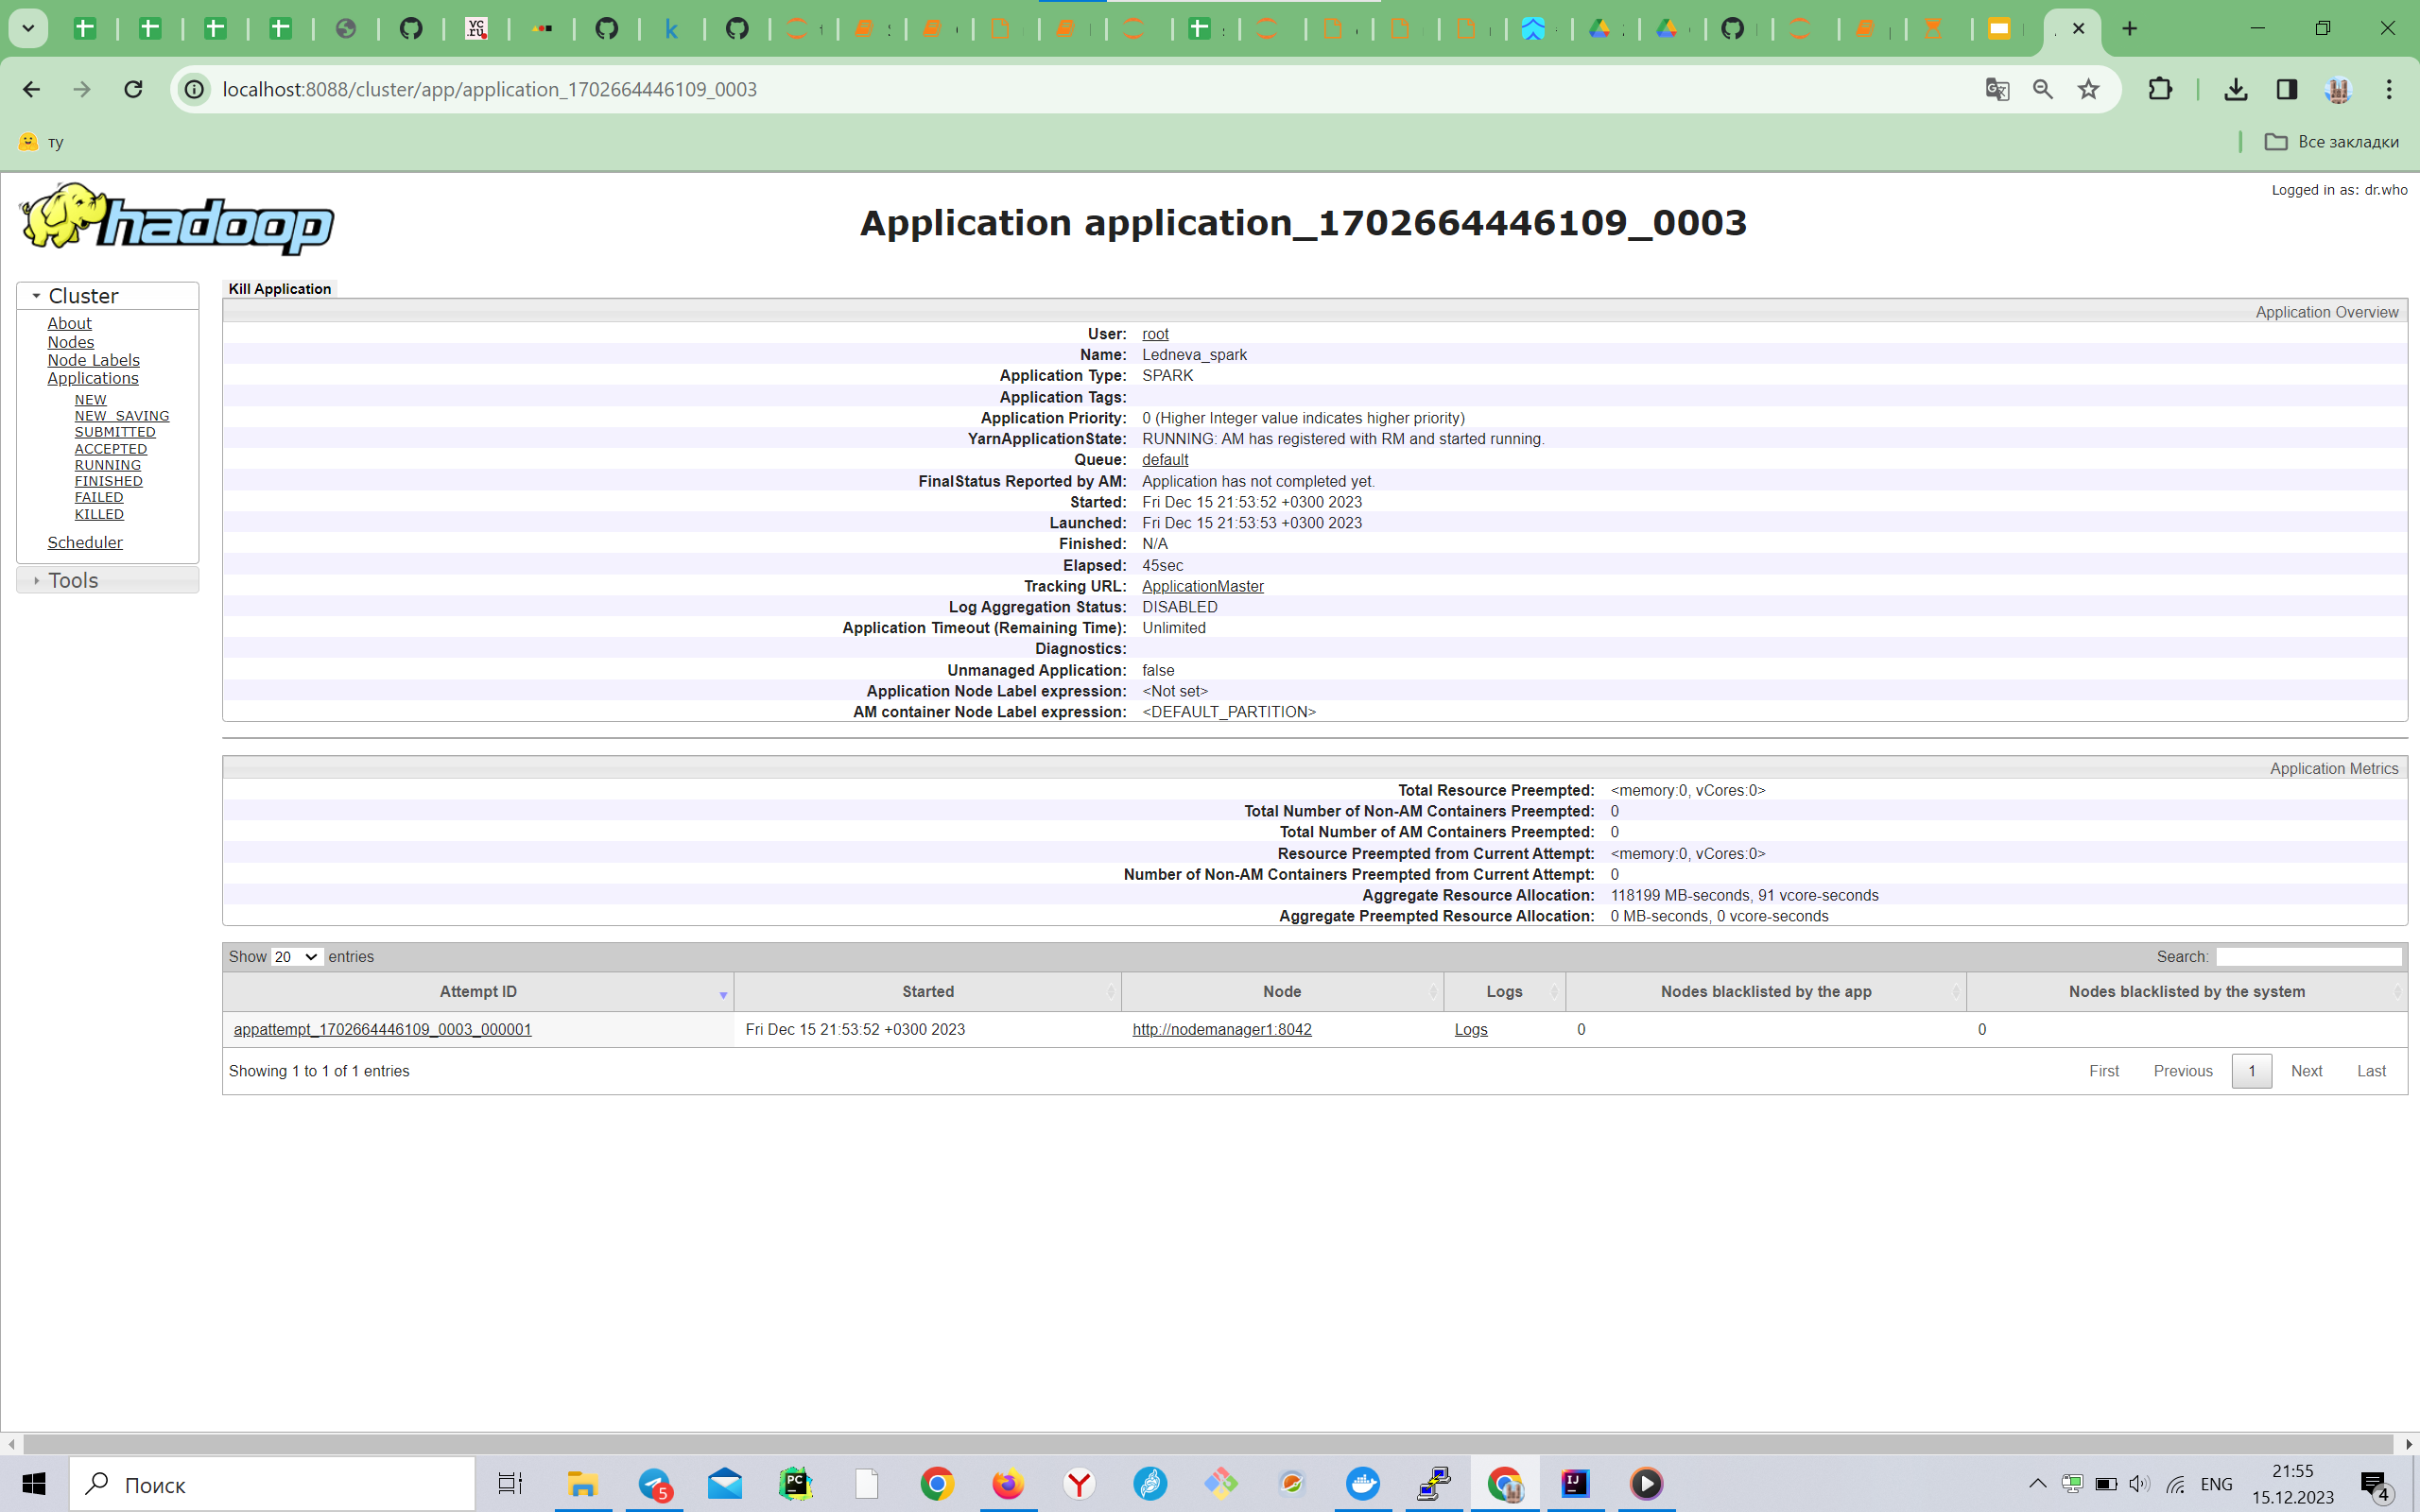

Скрин Spark UI
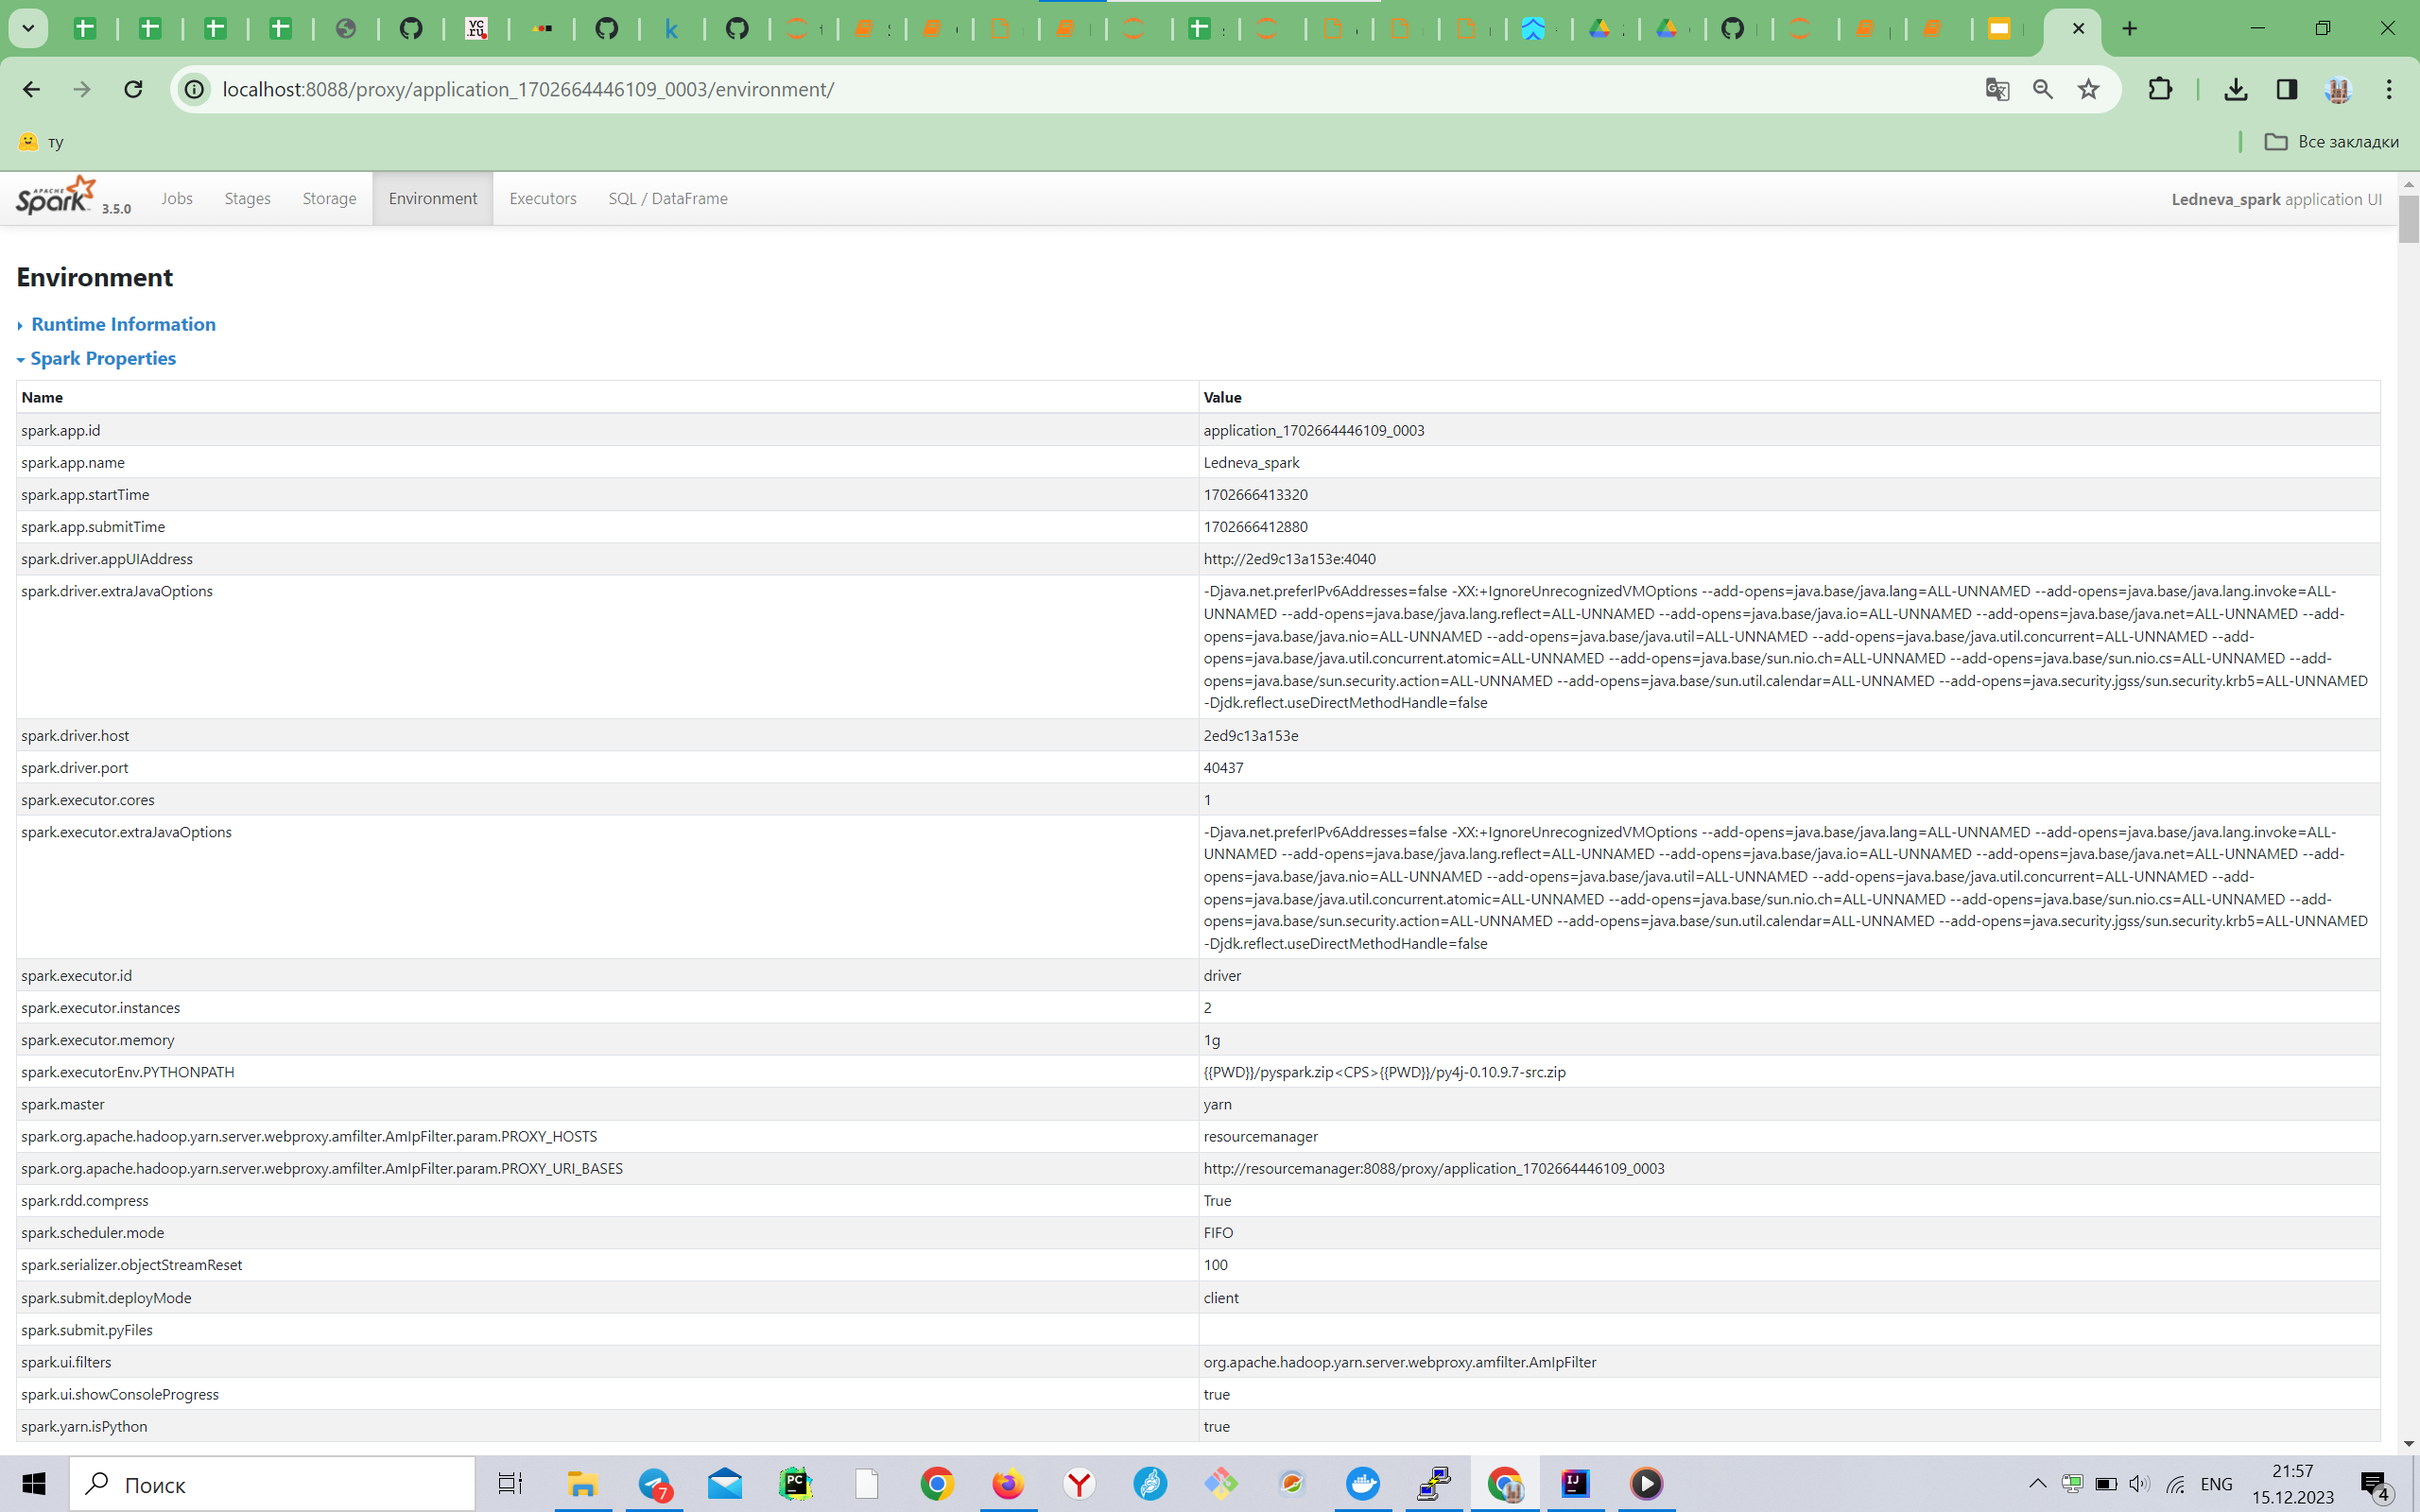

In [1]:
!hdfs dfsadmin -safemode leave

Safe mode is OFF


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Ledneva_spark") \
    .master("yarn") \
    .config("spark.executor.instances", 2) \
    .config("spark.executor.cores", 1) \
    .config("spark.executor.memory", "1g") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/15 21:53:40 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


In [3]:
spark

In [4]:
!hdfs dfs -rm -r ml-latest-small

Deleted ml-latest-small


In [5]:
!hdfs dfs -put ml-latest-small

In [12]:
path_ratings_table = "hdfs:///user/root/ml-latest-small/ratings.csv"
path_tags_table = "hdfs:///user/root/ml-latest-small/tags.csv"

ratings_table = spark.read.csv(path_ratings_table, header = True, inferSchema = True)
tags_table = spark.read.csv(path_tags_table, header = True, inferSchema = True)

print(f"Количество строк в таблице ratings: {ratings_table.count()}")
print(f"Количество строк в таблице tags: {tags_table.count()}")

Количество строк в таблице ratings: 100836


Количество строк в таблице tags: 3683


Скрин Spark UI с выполненной джобой
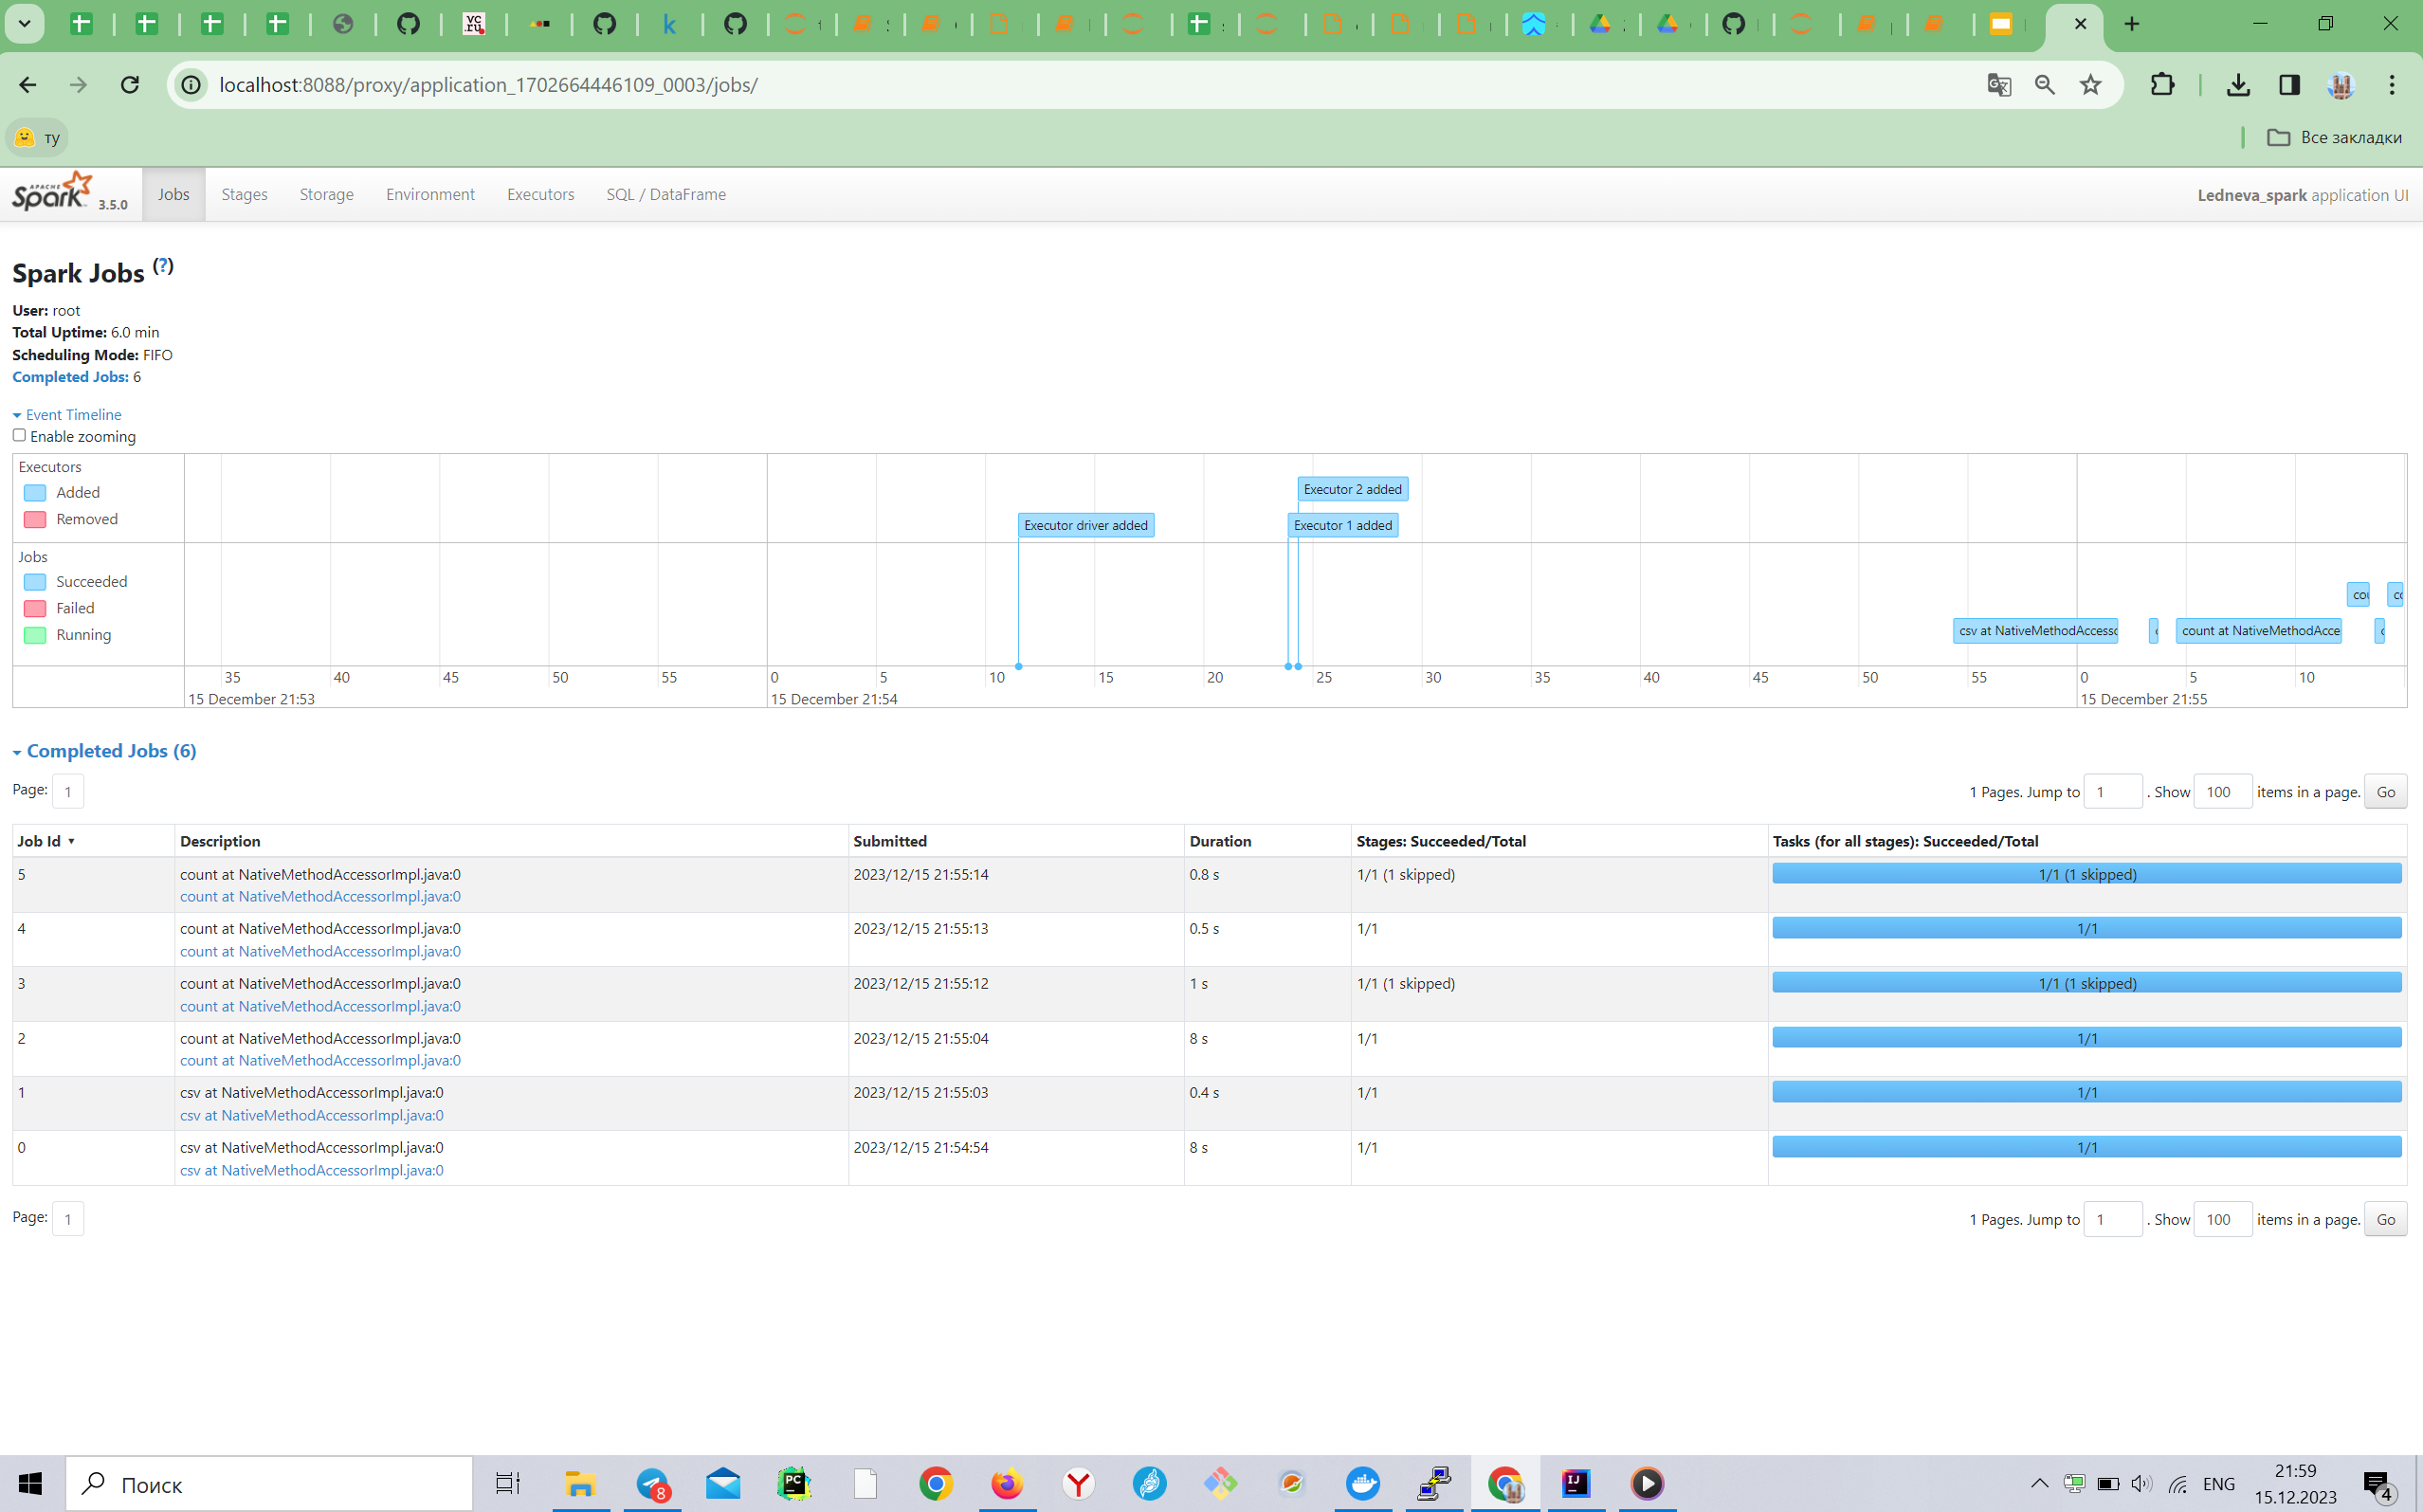

Всего было выполнено 6 tasks и 6 stages

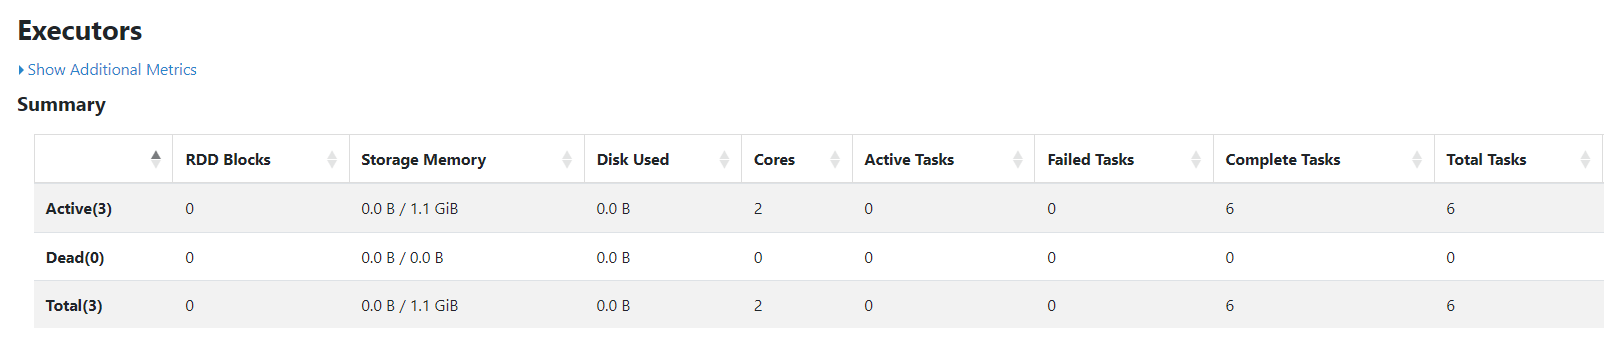
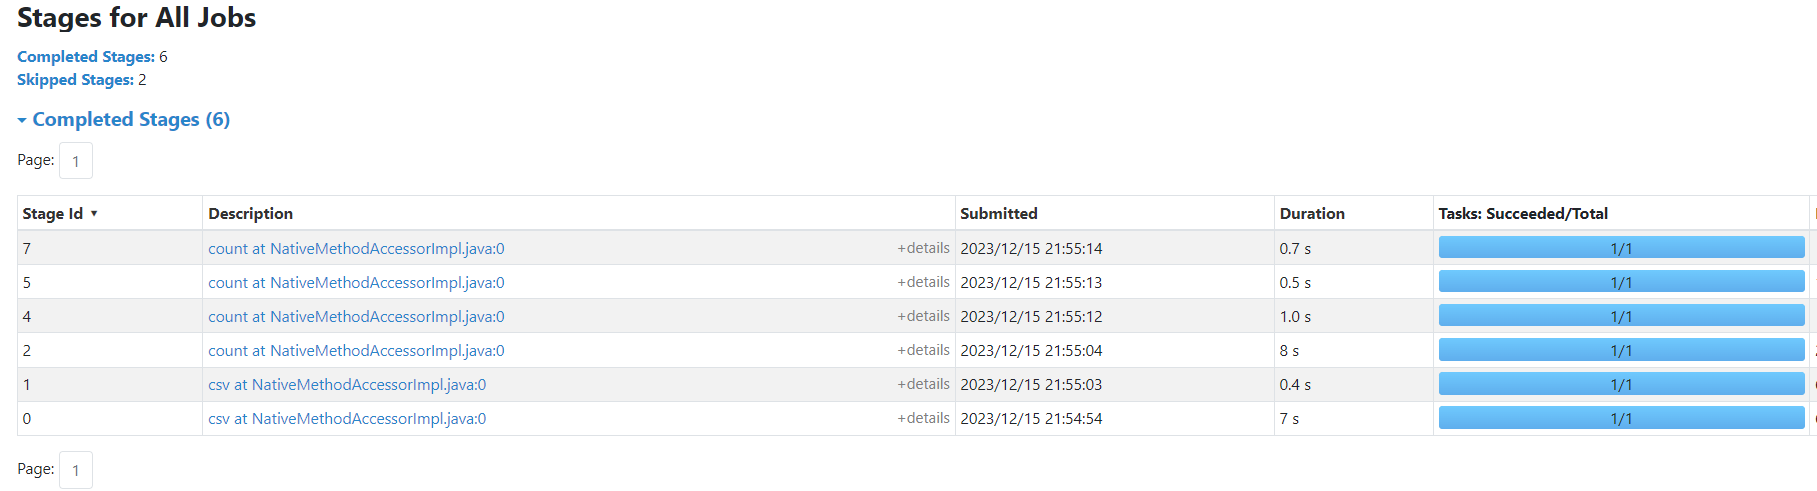

In [8]:
# spark.stop()

# Задание 2

## Работа с данными

In [13]:
ratings_table # схема таблицы, я ее вывела, чтобы ознакомиться с атрибутами и типами

DataFrame[userId: int, movieId: int, rating: double, timestamp: int]

In [14]:
tags_table # схема таблицы, я ее вывела, чтобы ознакомиться с атрибутами и типами

DataFrame[userId: int, movieId: int, tag: string, timestamp: int]

In [16]:
num_unique_movies = ratings_table.select("movieId").distinct().count()
num_unique_users = ratings_table.select("userId").distinct().count()

print(f"Количество уникальных фильмов: {num_unique_movies}")
print(f"Количество уникальных пользователей: {num_unique_users}")

Количество уникальных фильмов: 9724
Количество уникальных пользователей: 610


In [17]:
import pyspark.sql.functions as F
num_rating_more_4 = ratings_table.filter(F.col("rating") >= 4.0).count()

print(f"Количество оценок >= 4.0: {num_rating_more_4}")

Количество оценок >= 4.0: 48580


In [21]:
film_ratings_table = ratings_table.groupBy("movieId").agg(
    F.avg("rating").alias("avg_rating")
).orderBy(F.desc("avg_rating"))

film_ratings_table.show(100) # это если и фильм, и рейтинг

+-------+----------+
|movieId|avg_rating|
+-------+----------+
|  80124|       5.0|
|  74226|       5.0|
| 175387|       5.0|
|    148|       5.0|
| 158027|       5.0|
|  67618|       5.0|
|  42556|       5.0|
| 142444|       5.0|
|  44943|       5.0|
|  27523|       5.0|
| 113829|       5.0|
|   3073|       5.0|
| 152711|       5.0|
| 132333|       5.0|
|     53|       5.0|
|  27704|       5.0|
| 147300|       5.0|
| 187717|       5.0|
|    633|       5.0|
|   8238|       5.0|
|    876|       5.0|
| 120138|       5.0|
|  53578|       5.0|
| 163072|       5.0|
| 160644|       5.0|
| 172909|       5.0|
|   5490|       5.0|
| 172583|       5.0|
|   2972|       5.0|
|   2196|       5.0|
|  25887|       5.0|
| 118834|       5.0|
|   3795|       5.0|
| 156025|       5.0|
|   3941|       5.0|
| 120130|       5.0|
|    626|       5.0|
|   1349|       5.0|
|  26928|       5.0|
| 122092|       5.0|
|  40491|       5.0|
|  71268|       5.0|
| 167064|       5.0|
|  99636|       5.0|
|  25906|    

In [22]:
film_ratings_table.select("movieId").show(100) # а так только фильмы с самым высоким рейтингом

+-------+
|movieId|
+-------+
|  80124|
|  74226|
| 175387|
|    148|
| 158027|
|  67618|
|  42556|
| 142444|
|  44943|
|  27523|
| 113829|
|   3073|
| 152711|
| 132333|
|     53|
|  27704|
| 147300|
| 187717|
|    633|
|   8238|
|    876|
| 120138|
|  53578|
| 163072|
| 160644|
| 172909|
|   5490|
| 172583|
|   2972|
|   2196|
|  25887|
| 118834|
|   3795|
| 156025|
|   3941|
| 120130|
|    626|
|   1349|
|  26928|
| 122092|
|  40491|
|  71268|
| 167064|
|  99636|
|  25906|
|   6086|
| 141928|
|  47736|
|   6201|
| 164367|
|   3792|
| 172589|
| 146684|
|   3473|
| 172793|
|  50999|
| 136469|
| 141718|
| 124851|
|  85295|
|   4788|
| 173619|
|   6835|
|   2824|
|    496|
|  26147|
| 157775|
|   4454|
|  44851|
| 104780|
| 149566|
|   7096|
| 109241|
| 131724|
|   3567|
|  69211|
| 136834|
| 163925|
|   3940|
| 173355|
|  91386|
|   7815|
|   5513|
| 115727|
|  84273|
| 172705|
|  27373|
| 109633|
| 114265|
| 172875|
| 163112|
| 159811|
|  94810|
| 147286|
|  53355|
|   7122|
|  69860|


In [30]:
ratings_tags_table = ratings_table.join(
    tags_table.withColumn("tags_timestamp", F.col("timestamp")).drop("timestamp"),
    on = ["userId", "movieId"],
    how = "inner"
    # нужно inner, потому что тогда не сможем дельту посчитать, если либо тег, либо оценка, но не все вместе
).withColumn(
    "time_delta", F.col("tags_timestamp") - F.col("timestamp")
).withColumn(
    "abs_time_delta", F.abs(F.col("tags_timestamp") - F.col("timestamp"))
    # смутило, что кто-то теги поставил перед оценкой
    # поэтому будет две средних дельты: по честной разности между тегом и меткой и по модулю разности
)

ratings_tags_table.orderBy(["userId", "movieId"]).show()

+------+-------+------+----------+-----------------+--------------+----------+--------------+
|userId|movieId|rating| timestamp|              tag|tags_timestamp|time_delta|abs_time_delta|
+------+-------+------+----------+-----------------+--------------+----------+--------------+
|     2|  60756|   5.0|1445714980|     will ferrell|    1445714992|        12|            12|
|     2|  60756|   5.0|1445714980|  Highly quotable|    1445714996|        16|            16|
|     2|  60756|   5.0|1445714980|            funny|    1445714994|        14|            14|
|     2|  89774|   5.0|1445715189|        Tom Hardy|    1445715205|        16|            16|
|     2|  89774|   5.0|1445715189|              MMA|    1445715200|        11|            11|
|     2|  89774|   5.0|1445715189|     Boxing story|    1445715207|        18|            18|
|     2| 106782|   5.0|1445714966|  Martin Scorsese|    1445715056|        90|            90|
|     2| 106782|   5.0|1445714966|Leonardo DiCaprio|    1445

In [38]:
avg_delta_per_each_user_movie_tag = ratings_tags_table.agg(
    F.avg("time_delta").alias("avg_time_delta"),
    F.avg("abs_time_delta").alias("avg_abs_time_delta")    
)
# это среднее по всем тройкам пользователь - фильм - тэг

print("Средняя дельта по всем моментам тегирования пользователем фильма: {} секунд".format(
    avg_delta_per_each_user_movie_tag.collect()[0]["avg_time_delta"])
)
print("Средняя дельта (взята по модулю) по всем моментам тегирования пользователем фильма: {} секунд".format(
    avg_delta_per_each_user_movie_tag.collect()[0]["avg_abs_time_delta"])
)

Средняя дельта по всем моментам тегирования пользователем фильма: 26243727.372266974 секунд
Средняя дельта (взята по модулю) по всем моментам тегирования пользователем фильма: 29203715.568469506 секунд


In [40]:
avg_ratings_per_each_user = ratings_table.groupBy("userId").agg(
    F.avg("rating").alias("avg_user_rating"))

avg_ratings_per_each_user.show()

+------+------------------+
|userId|   avg_user_rating|
+------+------------------+
|   148|3.7395833333333335|
|   463| 3.787878787878788|
|   471|             3.875|
|   496| 3.413793103448276|
|   243| 4.138888888888889|
|   392|               3.2|
|   540|               4.0|
|    31|              3.92|
|   516|3.6923076923076925|
|    85|3.7058823529411766|
|   137| 3.978723404255319|
|   251| 4.869565217391305|
|   451|3.7941176470588234|
|   580| 3.529816513761468|
|    65| 4.029411764705882|
|   458|4.1525423728813555|
|    53|               5.0|
|   255|2.5681818181818183|
|   481| 2.806451612903226|
|   588|              3.25|
+------+------------------+
only showing top 20 rows



In [41]:
avg_over_avg_user_rating = avg_ratings_per_each_user.agg(
    F.avg("avg_user_rating").alias("avg_over_avg_user_rating")).collect()[0]["avg_over_avg_user_rating"]

print(f"Средняя оценка по всем усредненным оценкам: {avg_over_avg_user_rating}")

Средняя оценка по всем усредненным оценкам: 3.6572223377474016
